In [1]:
import qsharp
from numpy import arccos,radians,degrees,pi,sqrt
from qiskit.visualization import plot_bloch_vector

Preparing Q# environment...


In [2]:
%%qsharp

open Microsoft.Quantum.Intrinsic;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Convert;
open Microsoft.Quantum.Canon;
open Microsoft.Quantum.Math;

operation RandomNumberBitsGenerator() : Result {
    
    use q1 = Qubit();
    
    H(q1);
    
    DumpMachine();
    
    mutable measured_bits = [];
    mutable final_bits = 0;
    
    set measured_bits += [M(q1)];
    set final_bits = ResultArrayAsInt(measured_bits);
    
    Message($"The qubit mapped to the classical bit yielded: {IntAsString(final_bits)}");
    
    return M(q1);
}

operation CalculateNumber(max_number : Int) :  Int {
    mutable result = 0;
    repeat{
        mutable output_bits = [];
        for index in 1..BitSizeI(max_number){
            set output_bits += [RandomNumberBitsGenerator()];
        }
        
        set result = ResultArrayAsInt(output_bits);
    } until (result <= max_number);
    
    return result;
}

operation MainFunction() : Unit {
    let max_number = 80;
    Message($"The random number is : {IntAsString(CalculateNumber(max_number))}");
}

In [3]:
MainFunction.simulate()

|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0.7071067811865476 + 0𝑖

The qubit mapped to the classical bit yielded: 0


|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0.7071067811865476 + 0𝑖

The qubit mapped to the classical bit yielded: 1


|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0.7071067811865476 + 0𝑖

The qubit mapped to the classical bit yielded: 1


|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0.7071067811865476 + 0𝑖

The qubit mapped to the classical bit yielded: 1


|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0.7071067811865476 + 0𝑖

The qubit mapped to the classical bit yielded: 0


|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0.7071067811865476 + 0𝑖

The qubit mapped to the classical bit yielded: 0


|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0.7071067811865476 + 0𝑖

The qubit mapped to the classical bit yielded: 1
The random number is : 78


()

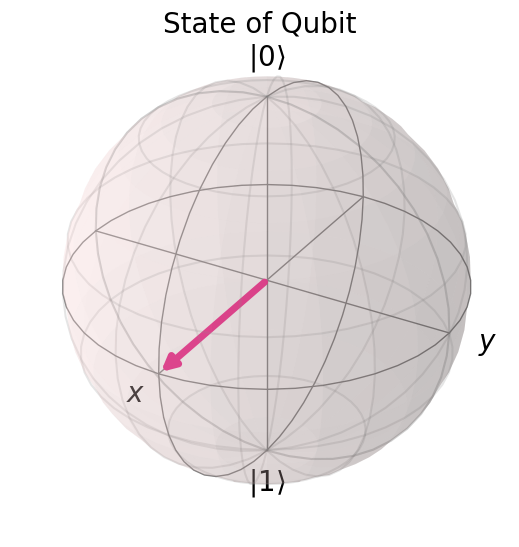

In [4]:
theta_After = radians(degrees(2 * arccos(1/sqrt(2))))
radius = 1
phi_After = 0

plot_bloch_vector([radius,theta_After,phi_After], coord_type = "spherical", 
                  title = "State of Qubit")